# snow_partitioning_parallel
The filter is used to perform SNOW algorithm in parallel and serial mode to save computational time and memory requirement respectively. [SNOW](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.96.023307) algorithm converts a binary image in to partitioned regions while avoiding oversegmentation. SNOW_partitioning_parallel speeds up this process by decomposing the domain into several subdomains and either process them in different cores in parallel to save time or one by one in single core to save memory requirements.     

## Apply filter function

In [1]:
import numpy as np
import porespy as ps
from porespy.tools import randomize_colors
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

np.random.seed(10)
ps.visualization.set_mpl_style()

## Create image and variables

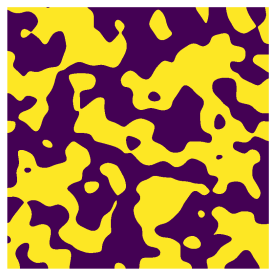

In [2]:
np.random.seed(1)
im = ps.generators.blobs(shape=[800, 800])
plt.imshow(im, origin='lower')
plt.axis(False);

## Apply filter function

In [3]:
snow_para = ps.filters.snow_partitioning_parallel(im, overlap=None, divs=2, r_max=5, sigma=0.4,)
snow = ps.filters.snow_partitioning(im, r_max=5, sigma=0.4)

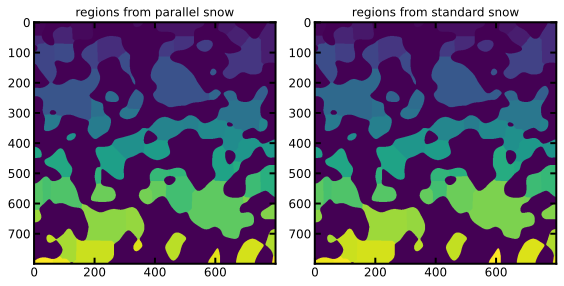

In [4]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(snow_para.regions)
ax[1].imshow(snow.regions)
ax[0].set_title('regions from parallel snow')
ax[1].set_title('regions from standard snow');